In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot 
from scipy import stats

from IPython.display import display
pd.options.display.max_columns = None
#pd.options.display.max_columns = 100
#pd.options.display.max_rows = None --> shows all rows, your notebooks becomes slow 
pd.options.display.max_rows = 200

import warnings
warnings.filterwarnings('ignore')

import os
print (os.getcwd())
#print (os.listdir())

/Users/rajkiran/Desktop/MACHINE LEARNING Praveen/Notebooks


# Sanity / Data Integrity checks on data (part of EDA)
## As part of data analysis we refine the data - below are some common activities we do.
### Real world data is very dirty. To perform any analysis we need to first clean the data. Data cleaning can happen with these checks, if any issues found with these checks, they should be fixed with appropriate techniques.

#### Quality : Check for duplicates, accuracy, unusual data.
#### Missing : Check for missing or incomplete data, impute/fillna with appropriate data
#### Parse : Prase existing data and create new fearures. e.g. Extract year and month from date 
#### Convert : Free text to coded value (LabelEncoder, One-Hot-Encoding or LabelBinarizer)
#### Derive : Derive new feature out of existing featre/fearues e.g. gender from title Mr. Mrs. Calculate percentages, proportion
#### Remove : Remove redundant or not so useful data
#### Merge : Merge multiple columns e.g. first and surname for full name
#### Aggregate : e.g. rollup by year, cluster by area
#### Filter : e.g. exclude based on location
#### Sample : e.g. extract a representative data
#### Summary : Pandas describe function or stats like mean

In [2]:
house_df = pd.read_csv("/Users/rajkiran/Desktop/MACHINE LEARNING Praveen/Notebooks/housing_price.csv")
house_df.shape

(1460, 81)

In [3]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
print(house_df.shape)
del house_df['Id']
print(house_df.shape)
house_df.head()

(1460, 81)
(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [6]:
type(house_df.dtypes)

pandas.core.series.Series

In [7]:
np.unique(house_df.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
house_df.select_dtypes(include=['int64','float64']).columns.shape

(37,)

In [9]:
house_df.select_dtypes(include=['object']).columns.shape

(43,)

In [10]:
37+43   # Cross verify No of Columns

80

In [11]:
house_df[house_df.select_dtypes(include=['int64','float64']).columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
house_df.describe(include = ['int64','float64'])    # 2nd method to Get ONLY INT64 And FLOAT64

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
house_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [14]:
house_df['MSZoning'].value_counts()   # counting  number of Unique Values in MSZoning Feature

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [15]:
type(house_df['MSZoning'])

pandas.core.series.Series

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

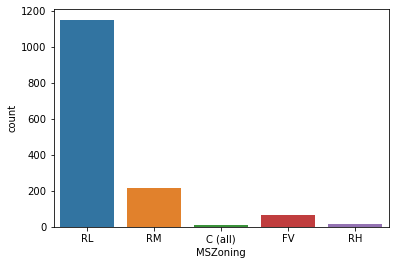

In [16]:
sns.countplot(house_df['MSZoning'])

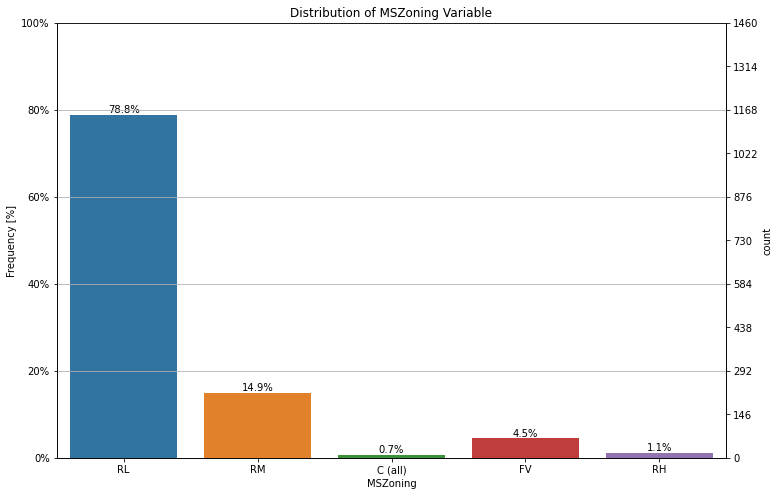

In [17]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(house_df['MSZoning']) 
ncount = len(house_df['MSZoning']) 
plt.title('Distribution of MSZoning Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

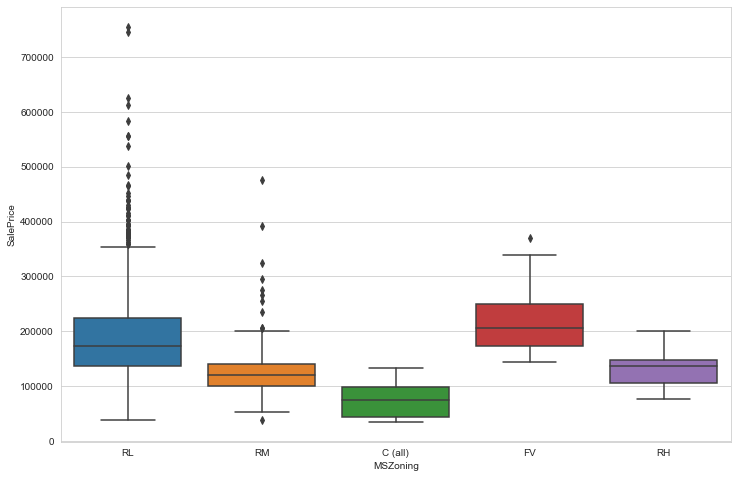

In [18]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house_df);

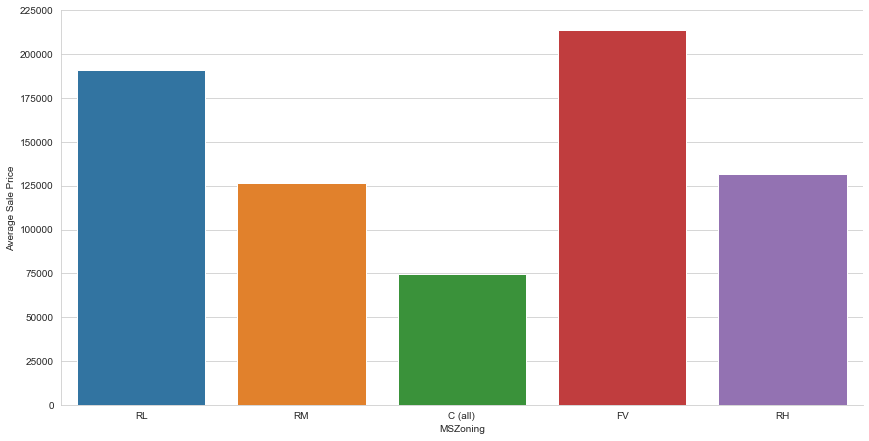

In [19]:
gr = sns.catplot(data=house_df, x="MSZoning", y="SalePrice", \
                 kind="bar", ci=None,size=6, aspect=2)
plt.xlabel("MSZoning") 
plt.ylabel("Average Sale Price")
#l1 = gr.set_yticklabels( rotation = 90) #l2 = gr.set_xticklabels(rotation = 90)
l1 = gr.set_yticklabels()
l2 = gr.set_xticklabels()

In [20]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
house_df['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

### Exploring  LOTSHAPE Feature :

In [22]:
house_df["LotShape"]

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object

In [23]:
house_df["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [24]:
house_df["LotShape"].shape

(1460,)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

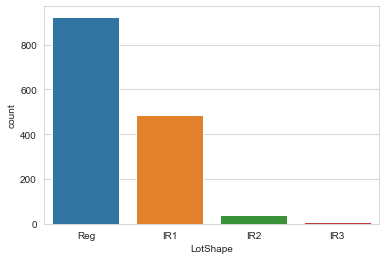

In [25]:
sns.countplot(house_df["LotShape"])

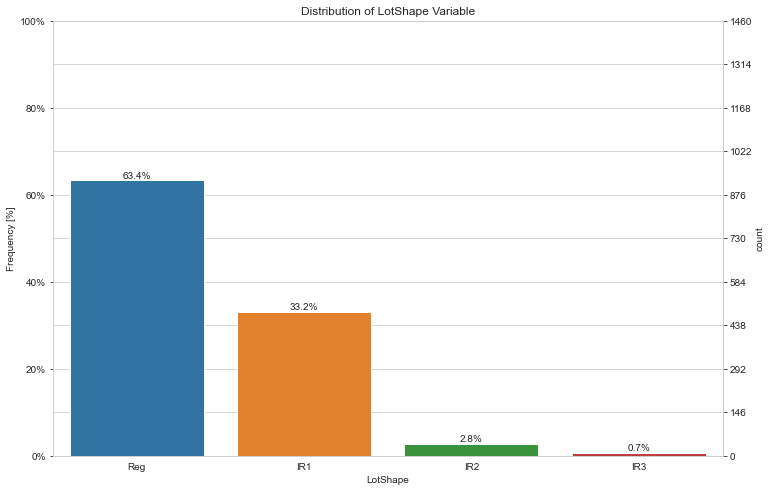

In [26]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(house_df['LotShape']) 
ncount = len(house_df['LotShape']) 
plt.title('Distribution of LotShape Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

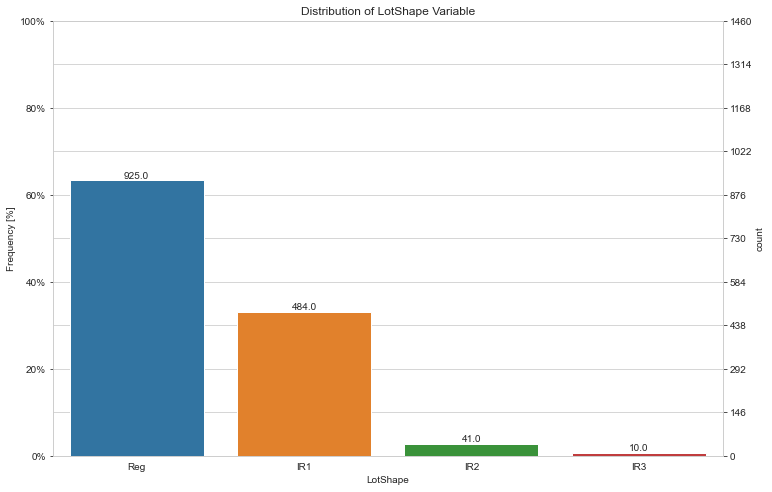

In [27]:
import matplotlib.ticker as ticker 
plt.figure(figsize=(12,8))
ax = sns.countplot(house_df['LotShape']) 
ncount = len(house_df['LotShape']) 
plt.title('Distribution of LotShape Variable')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] 
    y=p.get_bbox().get_points()[1,1] 
    #ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(), y),ha='center', va='bottom')# set the alignment of the text
    ax.annotate('{}'.format(y),(x.mean(), y),ha='center', va='bottom')
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
# And use a MultipleLocator to ensure a tick spacing of 10
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
fmt = '%.0f%%'
yticks = ticker.FormatStrFormatter( fmt ) 
ax2.yaxis.set_major_formatter( yticks )
# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)
#plt.savefig('MSZoning_Variable.pdf')

In [28]:
house_df['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

<AxesSubplot:ylabel='YearBuilt'>

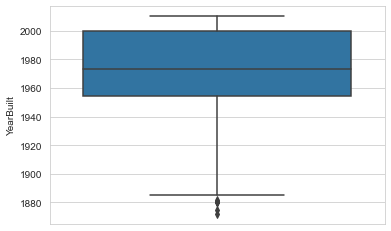

In [30]:
sns.boxplot(x=None,y='YearBuilt',data=house_df)

In [31]:
house_df.loc[house_df['GarageArea']== 480].loc[house_df['GarageCars'] == 4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1340,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,Y,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000


## When you have 2 conditions, Use 
##          df.loc[ Statement 1] . loc [ Statement 2 ]

In [32]:
house_df.shape

(1460, 80)

In [33]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [34]:
house_df['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [35]:
house_df["YearBuilt_Label"] = pd.Series()

In [36]:
house_df[['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
0,2003,NaN
1,1976,NaN
2,2001,NaN
3,1915,NaN
4,2000,NaN
...,...,...
1455,1999,NaN
1456,1978,NaN
1457,1941,NaN
1458,1950,NaN


In [37]:
print(house_df.loc[house_df['YearBuilt']<1980]['YearBuilt'].index)
len(house_df.loc[house_df['YearBuilt']<1980]['YearBuilt'].index)

Int64Index([   1,    3,    7,    8,    9,   10,   12,   14,   15,   16,
            ...
            1443, 1445, 1446, 1448, 1449, 1450, 1456, 1457, 1458, 1459],
           dtype='int64', length=848)


848

In [38]:
access_indx = house_df.loc[house_df['YearBuilt']<1980]['YearBuilt'].index

In [39]:
house_df.loc[access_indx][['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
1,1976,NaN
3,1915,NaN
7,1973,NaN
8,1931,NaN
9,1939,NaN
...,...,...
1450,1974,NaN
1456,1978,NaN
1457,1941,NaN
1458,1950,NaN


In [40]:
house_df.loc[access_indx,'YearBuilt_Label'] = "before_eighities_home"

In [41]:
house_df.loc[access_indx][['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
1,1976,before_eighities_home
3,1915,before_eighities_home
7,1973,before_eighities_home
8,1931,before_eighities_home
9,1939,before_eighities_home
...,...,...
1450,1974,before_eighities_home
1456,1978,before_eighities_home
1457,1941,before_eighities_home
1458,1950,before_eighities_home


In [42]:
house_df[['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
0,2003,NaN
1,1976,before_eighities_home
2,2001,NaN
3,1915,before_eighities_home
4,2000,NaN
...,...,...
1455,1999,NaN
1456,1978,before_eighities_home
1457,1941,before_eighities_home
1458,1950,before_eighities_home


##  Now For Twenties Home's

In [43]:
print(house_df.loc[house_df['YearBuilt']>2000]['YearBuilt'].index)
len(house_df.loc[house_df['YearBuilt']>2000]['YearBuilt'].index)

Int64Index([   0,    2,    6,   11,   13,   18,   20,   22,   25,   27,
            ...
            1422, 1430, 1437, 1441, 1442, 1444, 1451, 1452, 1453, 1454],
           dtype='int64', length=364)


364

In [44]:
access_indx1 = house_df.loc[house_df['YearBuilt']>2000]['YearBuilt'].index

In [45]:
house_df.loc[access_indx1][['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
0,2003,NaN
2,2001,NaN
6,2004,NaN
11,2005,NaN
13,2006,NaN
...,...,...
1444,2004,NaN
1451,2008,NaN
1452,2005,NaN
1453,2006,NaN


In [46]:
house_df.loc[access_indx1,'YearBuilt_Label'] = "twenties home"

In [47]:
house_df.loc[access_indx1][['YearBuilt','YearBuilt_Label']]

,YearBuilt,YearBuilt_Label
0,2003,twenties home
2,2001,twenties home
6,2004,twenties home
11,2005,twenties home
13,2006,twenties home
...,...,...
1444,2004,twenties home
1451,2008,twenties home
1452,2005,twenties home
1453,2006,twenties home


## now for 1980 and 1990 homes

In [48]:
#print(house_df.loc[house_df['YearBuilt']>1980]) and (house_df.loc[house_df['YearBuilt']<1990])['YearBuilt'].index)
#len(house_df.loc[house_df['YearBuilt']>1980]) 
#and (house_df.loc[house_df['YearBuilt']<1990])['YearBuilt']

In [49]:
#gret_1980=house_df[house_df['YearBuilt']>=1980]
#less_1990=gret_1980.loc[house_df['YearBuilt']<=1990]['YearBuilt']
#less_1990.shape

In [50]:
label_1980=house_df.loc[house_df['YearBuilt']>=1980].loc[house_df['YearBuilt']<=1990].index
house_df.loc[label_1980,'YearBuilt_Label'] = "eighties Home"

In [51]:
house_df.loc[label_1980][['YearBuilt','YearBuilt_Label']].head()

,YearBuilt,YearBuilt_Label
42,1983,eighties Home
53,1981,eighties Home
71,1982,eighties Home
101,1985,eighties Home
118,1990,eighties Home


In [52]:
label_1990=house_df.loc[house_df['YearBuilt']>=1990].loc[house_df['YearBuilt']<=2000].index
house_df.loc[label_1990,'YearBuilt_Label'] = "nineties Home"

In [53]:
house_df.loc[label_1990][['YearBuilt','YearBuilt_Label']].head()

,YearBuilt,YearBuilt_Label
4,2000,nineties Home
5,1993,nineties Home
36,1994,nineties Home
50,1997,nineties Home
56,1999,nineties Home


In [54]:
house_df[['YearBuilt','YearBuilt_Label']].value_counts()

YearBuilt  YearBuilt_Label      
2006       twenties home            67
2005       twenties home            64
2004       twenties home            54
2007       twenties home            49
2003       twenties home            45
1976       before_eighities_home    33
1977       before_eighities_home    32
1920       before_eighities_home    30
1959       before_eighities_home    26
1998       nineties Home            25
1999       nineties Home            25
1954       before_eighities_home    24
2000       nineties Home            24
1958       before_eighities_home    24
1965       before_eighities_home    24
1970       before_eighities_home    24
2008       twenties home            23
1972       before_eighities_home    23
2002       twenties home            23
1968       before_eighities_home    22
1971       before_eighities_home    22
2001       twenties home            20
1957       before_eighities_home    20
1950       before_eighities_home    20
1962       before_eighities_hom

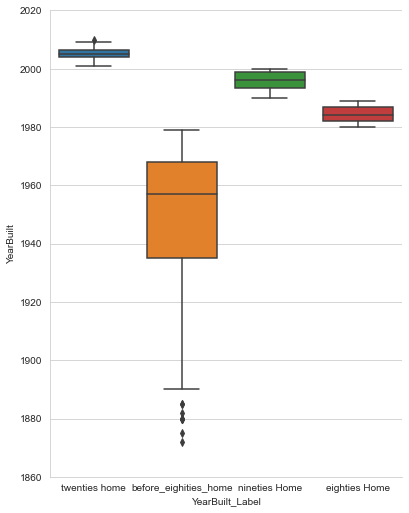

In [55]:
#sns.catplot(x='YearBuilt_Label',y='YearBuilt',data=house_df,kind='box')

gr = sns.catplot(data=house_df, x="YearBuilt_Label", y="YearBuilt", \
                 kind="box", ci=None,size=7, aspect=0.8)
plt.xlabel("YearBuilt_Label") 
plt.ylabel("YearBuilt")
#l1 = gr.set_yticklabels( rotation = 90) #l2 = gr.set_xticklabels(rotation = 90)
l1 = gr.set_yticklabels()
l2 = gr.set_xticklabels()
plt.savefig("box plot of  Yearbuilt_Label  vs Year Built.pdf")

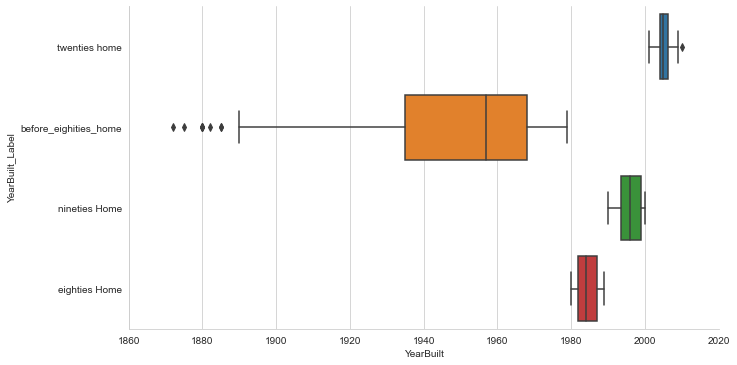

In [56]:
#sns.catplot(x='YearBuilt_Label',y='YearBuilt',data=house_df,kind='box')

gr = sns.catplot(data=house_df, x="YearBuilt", y="YearBuilt_Label", \
                 kind="box", ci=None,size=5, aspect=2)
plt.xlabel("YearBuilt") 
plt.ylabel("YearBuilt_Label")
#l1 = gr.set_yticklabels( rotation = 90) #l2 = gr.set_xticklabels(rotation = 90)
l1 = gr.set_yticklabels()
l2 = gr.set_xticklabels()
#plt.savefig("box plot of  Yearbuilt_Label  vs Year Built.pdf")

## Print those Observations which has YearBuild < 1980 from house_df 

<AxesSubplot:>

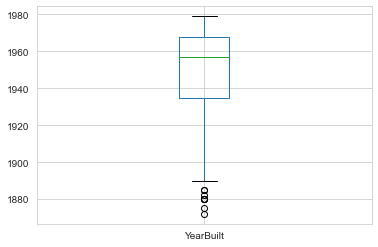

In [57]:
pd.DataFrame(house_df.loc[house_df['YearBuilt']<1980]['YearBuilt']).boxplot()
#plt.savefig("plot.pdf")

In [58]:
house_df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

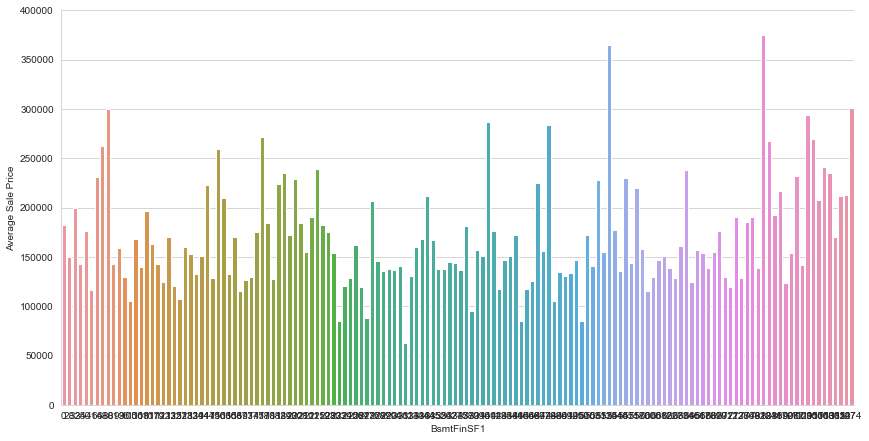

In [59]:
gr = sns.catplot(data=house_df, x="BsmtFinSF2", y="SalePrice", \
                 kind="bar", ci=None,size=6, aspect=2)
plt.xlabel("BsmtFinSF1") 
plt.ylabel("Average Sale Price")
#l1 = gr.set_yticklabels( rotation = 90) #l2 = gr.set_xticklabels(rotation = 90)
l1 = gr.set_yticklabels()
l2 = gr.set_xticklabels()

<AxesSubplot:>

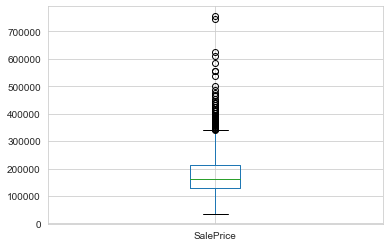

In [60]:
house_df['SalePrice'].plot(kind='box')

In [61]:
house_df['SalePrice'].min(),house_df['SalePrice'].mean(),house_df['SalePrice'].max()

(34900, 180921.19589041095, 755000)

##   <30K  : Cheap
##  30K- 18.10L  : moderatlty cheaper
##  >18.10 :costly

In [62]:
house_df['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
337000     1
412500     1
306000     1
195400     1
206000     1
Name: SalePrice, Length: 663, dtype: int64

In [63]:
house_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [64]:
house_df['SalePrice_Type'] = pd.Series()

In [65]:
house_df['SalePrice_Type']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: SalePrice_Type, Length: 1460, dtype: float64

In [66]:
house_df[['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
0,208500,NaN
1,181500,NaN
2,223500,NaN
3,140000,NaN
4,250000,NaN
...,...,...
1455,175000,NaN
1456,210000,NaN
1457,266500,NaN
1458,142125,NaN


##   "CH" House Price < 25% (i.e : from Min to 129975)

In [67]:
print(house_df.loc[house_df['SalePrice']<129975]['SalePrice'].index)
len(house_df.loc[house_df['SalePrice']<129975]['SalePrice'].index)

Int64Index([   8,    9,   10,   17,   23,   29,   30,   38,   39,   48,
            ...
            1418, 1421, 1428, 1432, 1436, 1443, 1445, 1448, 1449, 1453],
           dtype='int64', length=365)


365

In [68]:
label_ch= house_df.loc[house_df['SalePrice']<129975]['SalePrice'].index

In [69]:
house_df.loc[label_ch][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
8,129900,NaN
9,118000,NaN
10,129500,NaN
17,90000,NaN
23,129900,NaN
...,...,...
1443,121000,NaN
1445,129000,NaN
1448,112000,NaN
1449,92000,NaN


In [70]:
house_df.loc[label_ch,'SalePrice_Type'] = "CH"

In [71]:
house_df.loc[label_ch][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
8,129900,CH
9,118000,CH
10,129500,CH
17,90000,CH
23,129900,CH
...,...,...
1443,121000,CH
1445,129000,CH
1448,112000,CH
1449,92000,CH


In [72]:
print(house_df.loc[house_df['SalePrice']>214000]['SalePrice'].index)
len(house_df.loc[house_df['SalePrice']>214000]['SalePrice'].index)

Int64Index([   2,    4,    6,   11,   13,   20,   22,   25,   27,   34,
            ...
            1413, 1417, 1419, 1423, 1426, 1437, 1442, 1447, 1451, 1457],
           dtype='int64', length=362)


362

In [73]:
label_costly = house_df.loc[house_df['SalePrice']>214000]['SalePrice'].index

In [74]:
house_df.loc[label_costly][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
2,223500,NaN
4,250000,NaN
6,307000,NaN
11,345000,NaN
13,279500,NaN
...,...,...
1437,394617,NaN
1442,310000,NaN
1447,240000,NaN
1451,287090,NaN


In [75]:
house_df.loc[label_costly,'SalePrice_Type']= 'Costly'

In [76]:
house_df.loc[label_costly][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
2,223500,Costly
4,250000,Costly
6,307000,Costly
11,345000,Costly
13,279500,Costly
...,...,...
1437,394617,Costly
1442,310000,Costly
1447,240000,Costly
1451,287090,Costly


In [77]:
print(house_df.loc[house_df['SalePrice'].between(129975,214000)].index)
len(house_df.loc[house_df['SalePrice'].between(129975,214000)].index)

Int64Index([   0,    1,    3,    5,    7,   12,   14,   15,   16,   18,
            ...
            1441, 1444, 1446, 1450, 1452, 1454, 1455, 1456, 1458, 1459],
           dtype='int64', length=733)


733

In [78]:
label_mod_cheap =house_df.loc[house_df['SalePrice'].between(129975,214000)]['SalePrice'].index

In [79]:
house_df.loc[label_mod_cheap][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
0,208500,NaN
1,181500,NaN
3,140000,NaN
5,143000,NaN
7,200000,NaN
...,...,...
1454,185000,NaN
1455,175000,NaN
1456,210000,NaN
1458,142125,NaN


In [80]:
house_df.loc[label_mod_cheap,'SalePrice_Type'] = 'Moderatly High'

In [81]:
house_df.loc[label_mod_cheap][['SalePrice','SalePrice_Type']]

,SalePrice,SalePrice_Type
0,208500,Moderatly High
1,181500,Moderatly High
3,140000,Moderatly High
5,143000,Moderatly High
7,200000,Moderatly High
...,...,...
1454,185000,Moderatly High
1455,175000,Moderatly High
1456,210000,Moderatly High
1458,142125,Moderatly High


In [82]:
house_df['SalePrice_Type'].head(20)

0     Moderatly High
1     Moderatly High
2             Costly
3     Moderatly High
4             Costly
5     Moderatly High
6             Costly
7     Moderatly High
8                 CH
9                 CH
10                CH
11            Costly
12    Moderatly High
13            Costly
14    Moderatly High
15    Moderatly High
16    Moderatly High
17                CH
18    Moderatly High
19    Moderatly High
Name: SalePrice_Type, dtype: object

In [83]:
365+362+733

1460